In [2]:
!pip install numpy pandas geopandas matplotlib seaborn shapely fiona pyproj rtree geopy mapclassify pycountry

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os
import copy
from re import sub
from decimal import Decimal
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import geopandas
pd.set_option('display.max_columns', None)
%matplotlib inline

In [4]:
def curr_to_dec(money):
    return float(sub(r'[^\d.]', '', money))

In [5]:
def gdp_preproc(gdp_df):
    gdp_df = gdp_df[['GDP (nominal, 2017)','GDP per capita','Country']]
    gdp_df['GDP (nominal, 2017)'] = gdp_df['GDP (nominal, 2017)'].apply(curr_to_dec)
    gdp_df['GDP per capita'] = gdp_df['GDP per capita'].apply(curr_to_dec)
    return gdp_df
def preproc_col(df):
    return df.rename(columns={"Country,Other":"Country"}).drop(columns=['Unnamed: 0'])
def merge_gdp(df,gdp_df=pd.read_csv("./data/gdp.csv")): 
    return gdp_preproc(gdp_df).merge(df,on='Country')
def add_death_per_cases(df):
    df['Deaths/Cases'] = df['TotalDeaths']/df['TotalCases']
    return df
def duy_preproc(df):
    result = copy.deepcopy(df)
    result = result.drop(df.tail(8).index)    
    result = preproc_col(result)
    result = add_death_per_cases(result)
    result = merge_gdp(result)
    return result

In [6]:
df = pd.read_csv('./data/2022-04-27.csv')
df = duy_preproc(df)

/home/dungvt/.conda/envs/data_visualize/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dungvt/.conda/envs/data_visualize/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
df

,"GDP (nominal, 2017)",GDP per capita,Country,#,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Deaths/Cases
0,1.223770e+13,8612.0,China,1.0,207081,1824.0,4876.0,48.0,175431.0,3728.0,26774.0,318.0,144.0,3.0,160000000.0,111163.0,1.439324e+09,Asia,6951.0,295185.0,9.0,1.0,0.03,19.0,0.023546
1,4.872415e+12,38214.0,Japan,16.0,7725765,37258.0,29402.0,58.0,7263359.0,40195.0,433004.0,183.0,61426.0,234.0,46888808.0,372804.0,1.257734e+08,Asia,16.0,4278.0,3.0,296.0,0.50,3443.0,0.003806
2,3.693204e+12,44680.0,Germany,6.0,24488242,124863.0,135369.0,245.0,21885900.0,220700.0,2466973.0,1980.0,290591.0,1606.0,122332384.0,1451664.0,8.427047e+07,Europe,3.0,623.0,1.0,1482.0,3.00,29274.0,0.005528
3,2.650725e+12,1980.0,India,3.0,43068799,3133.0,523693.0,39.0,42528126.0,2563.0,16980.0,698.0,30662.0,373.0,835974079.0,595150.0,1.404643e+09,Asia,33.0,2682.0,2.0,2.0,0.03,12.0,0.012159
4,2.582501e+12,39827.0,France,5.0,28483124,67711.0,145579.0,152.0,26403836.0,158622.0,1933709.0,1677.0,434619.0,2221.0,266484045.0,4066235.0,6.553581e+07,Europe,2.0,450.0,0.0,1033.0,2.00,29506.0,0.005111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,4.276598e+08,4193.0,Tonga,193.0,9838,NaN,11.0,NaN,8721.0,NaN,1106.0,NaN,91202.0,102.0,423475.0,3925790.0,1.078700e+05,Australia/Oceania,11.0,9806.0,0.0,NaN,NaN,10253.0,0.001118
169,3.364275e+08,631.0,Micronesia,227.0,3,NaN,NaN,NaN,1.0,NaN,2.0,NaN,26.0,NaN,NaN,NaN,1.172130e+05,Australia/Oceania,39071.0,NaN,NaN,NaN,NaN,17.0,NaN
170,2.898235e+08,16275.0,Palau,211.0,4486,NaN,6.0,NaN,3913.0,NaN,567.0,1.0,245795.0,329.0,45500.0,2493014.0,1.825100e+04,Australia/Oceania,4.0,3042.0,0.0,NaN,NaN,31067.0,0.001337
171,2.041734e+08,3517.0,Marshall Islands,222.0,17,NaN,NaN,NaN,7.0,NaN,10.0,NaN,284.0,NaN,NaN,NaN,5.991500e+04,Australia/Oceania,3524.0,NaN,NaN,NaN,NaN,167.0,NaN


In [8]:
df = df.dropna(axis=0,subset=['Deaths/1M pop','Tot\xa0Cases/1M pop'])

In [9]:
df_1 = df[["GDP per capita","Deaths/Cases"]]

<AxesSubplot:xlabel='GDP (nominal, 2017)', ylabel='Deaths/Cases'>

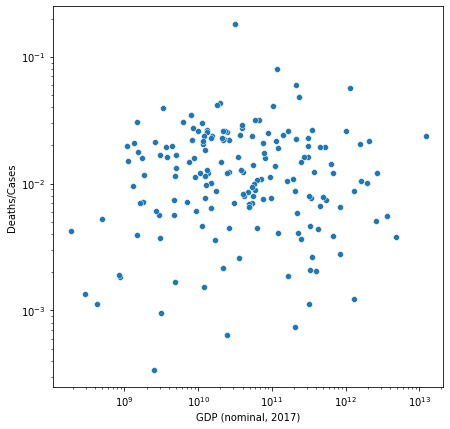

In [10]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(x='GDP (nominal, 2017)', y='Deaths/Cases', data=df,ax = ax)

In [11]:
import pycountry 


In [12]:
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
df['CODE'] = alpha3code(df['Country'])

/home/dungvt/.conda/envs/data_visualize/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


In [13]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
# then merge with our data 
merge=pd.merge(world,df,on='CODE')
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name')

In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

    print(world['name'])

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
5                    Kazakhstan
6                    Uzbekistan
7              Papua New Guinea
8                     Indonesia
9                     Argentina
10                        Chile
11              Dem. Rep. Congo
12                      Somalia
13                        Kenya
14                        Sudan
15                         Chad
16                        Haiti
17               Dominican Rep.
18                       Russia
19                      Bahamas
20                 Falkland Is.
21                       Norway
22                    Greenland
23       Fr. S. Antarctic Lands
24                  Timor-Leste
25                 South Africa
26                      Lesotho
27                       Mexico
28                      Uruguay
29                       Brazil
30                      Bolivia
31      

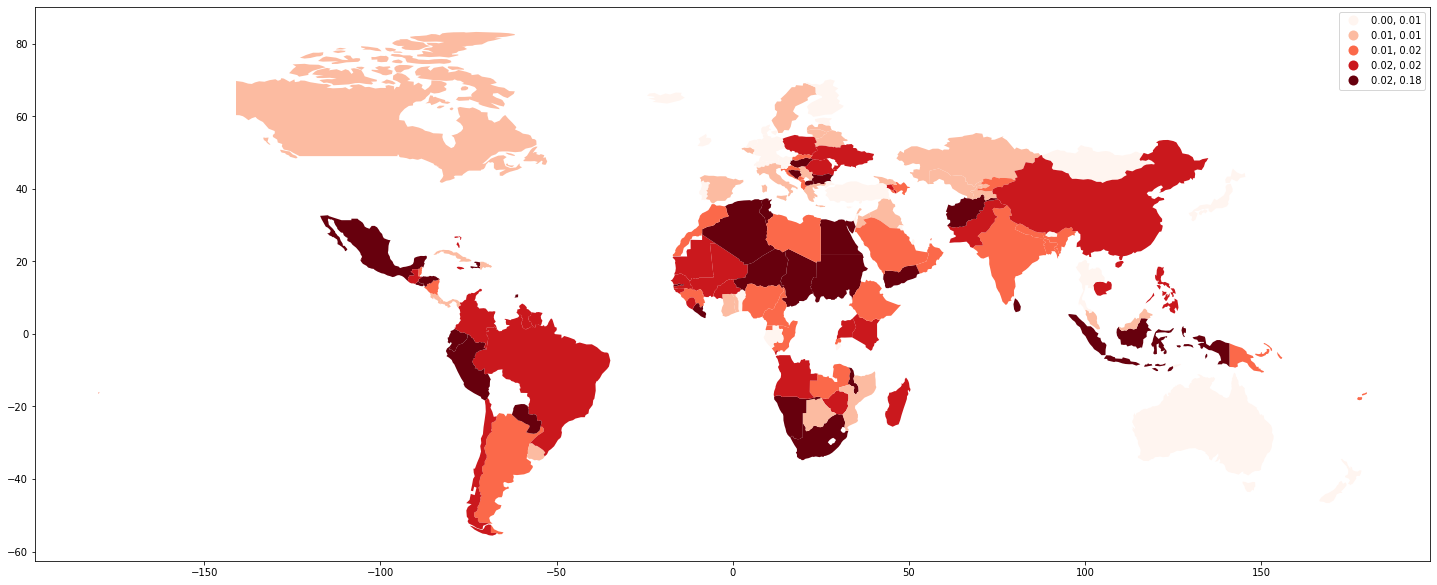

In [15]:
# plot confirmed cases world map 
merge.plot(column='Deaths/Cases', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='Reds')
# add countries names and numbers 

plt.show()

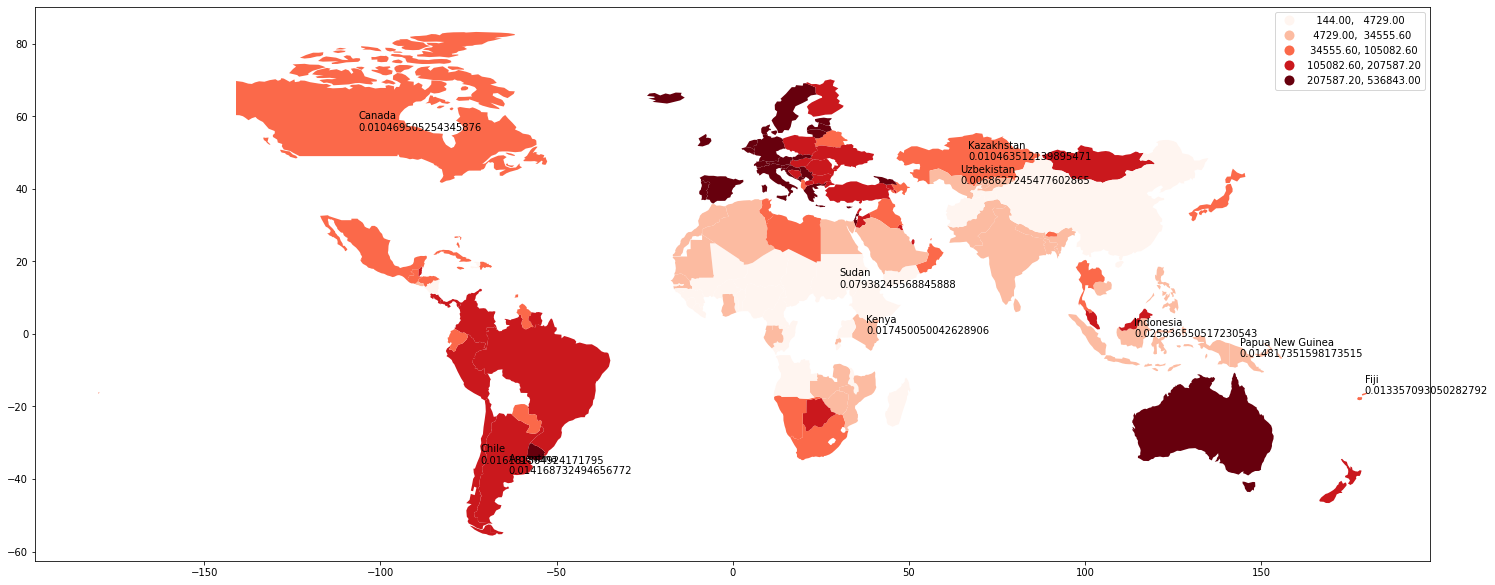

In [16]:
# plot confirmed cases world map 
merge.plot(column='Tot\xa0Cases/1M pop', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='Reds')
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge['Deaths/Cases'][i]),size=10)
plt.show()

<AxesSubplot:xlabel='Tot\xa0Cases/1M pop', ylabel='Deaths/Cases'>

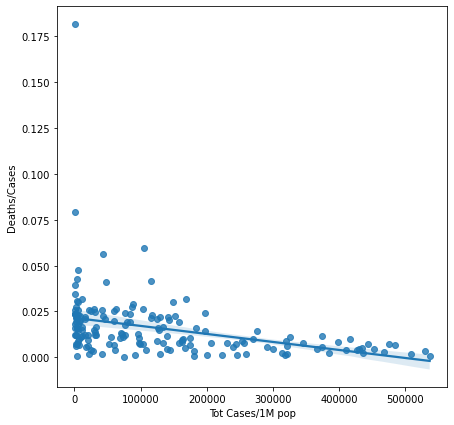

In [17]:

f, ax = plt.subplots(figsize=(7, 7))

sns.regplot(x='Tot\xa0Cases/1M pop', y='Deaths/Cases', data=df,ax = ax)

<AxesSubplot:xlabel='GDP (nominal, 2017)', ylabel='Deaths/Cases'>

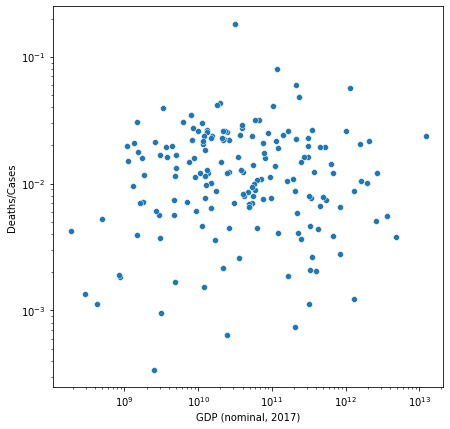

In [18]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(x='GDP (nominal, 2017)', y='Deaths/Cases', data=df,ax = ax)

In [19]:
w = np.ones(len(df))
w[len(df) * 6 // 10 :] = 2
w

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [20]:
Y = stats.zscore(df['Deaths/Cases'])
X = stats.zscore(df['Tot\xa0Cases/1M pop'])
model_OLS = sm.OLS(Y,X)
result_OLS = model_OLS.fit()
result_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Deaths/Cases   R-squared (uncentered):                   0.125
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              24.22
Date:                Tue, 03 May 2022   Prob (F-statistic):                    2.03e-06
Time:                        13:34:58   Log-Likelihood:                         -229.84
No. Observations:                 170   AIC:                                      461.7
Df Residuals:                     169   BIC:                                      464.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Tot Cases/1M pop    -0.3540      0.072     -4.921      0.000      -0.496      -0.212
==============================================================================
Omnibus:                      243.161   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21198.674
Skew:                           5.989   Prob(JB):                         0.00
Kurtosis:                      56.379   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
Y_pred = result_OLS.predict(X)

In [22]:
_std = np.sqrt((Y-Y_pred)**2)
_std

0      0.116773
1      0.860845
2      0.188844
3      0.459228
4      0.147610
         ...   
166    1.018744
167    0.516283
168    0.940322
170    0.540985
172    0.927983
Length: 170, dtype: float64

<AxesSubplot:xlabel='Tot\xa0Cases/1M pop'>

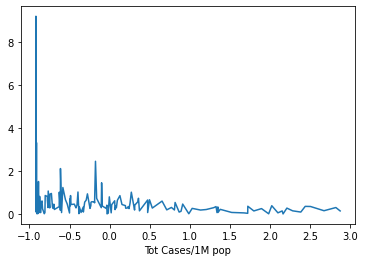

In [23]:
sns.lineplot(x = X,y = _std)

In [24]:
from sklearn.cluster import KMeans
X = merge[["Deaths/Cases","Tot\xa0Cases/1M pop"]]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
merge['label'] = kmeans.labels_

/home/dungvt/.conda/envs/data_visualize/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/home/dungvt/.conda/envs/data_visualize/lib/python3.7/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


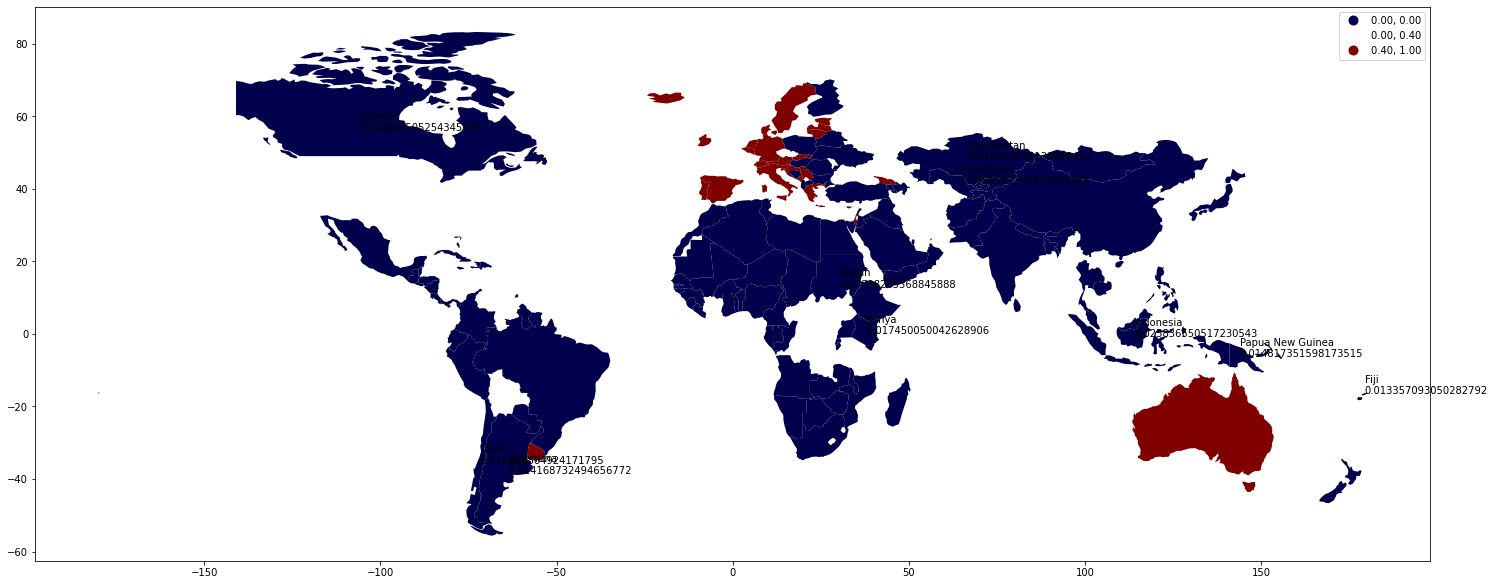

In [25]:
# plot confirmed cases world map 
merge.plot(column='label', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='seismic')
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge['Deaths/Cases'][i]),size=10)
plt.show()

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

    print(merge['Country'])

0                        Fiji
1                      Canada
2                  Kazakhstan
3                  Uzbekistan
4            Papua New Guinea
5                   Indonesia
6                   Argentina
7                       Chile
8                       Kenya
9                       Sudan
10                       Chad
11                      Haiti
12         Dominican Republic
13                    Bahamas
14                Timor-Leste
15               South Africa
16                     Mexico
17                    Uruguay
18                     Brazil
19                       Peru
20                   Colombia
21                     Panama
22                 Costa Rica
23                  Nicaragua
24                   Honduras
25                El Salvador
26                  Guatemala
27                     Belize
28                     Guyana
29                   Suriname
30                    Ecuador
31                    Jamaica
32                       Cuba
33        

In [27]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

print(f"{type(df_world)}, {df_world.geometry.name}")

print(df_world.head())

print(df_world.geometry.geom_type.value_counts())

NameError: name 'gpd' is not defined

In [28]:
df_world.plot(figsize=(10,6))


NameError: name 'df_world' is not defined

In [29]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

    print(df_world)

NameError: name 'df_world' is not defined

In [30]:
df

,"GDP (nominal, 2017)",GDP per capita,Country,#,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Deaths/Cases,CODE
0,1.223770e+13,8612.0,China,1.0,207081,1824.0,4876.0,48.0,175431.0,3728.0,26774.0,318.0,144.0,3.0,160000000.0,111163.0,1.439324e+09,Asia,6951.0,295185.0,9.0,1.0,0.03,19.0,0.023546,CHN
1,4.872415e+12,38214.0,Japan,16.0,7725765,37258.0,29402.0,58.0,7263359.0,40195.0,433004.0,183.0,61426.0,234.0,46888808.0,372804.0,1.257734e+08,Asia,16.0,4278.0,3.0,296.0,0.50,3443.0,0.003806,JPN
2,3.693204e+12,44680.0,Germany,6.0,24488242,124863.0,135369.0,245.0,21885900.0,220700.0,2466973.0,1980.0,290591.0,1606.0,122332384.0,1451664.0,8.427047e+07,Europe,3.0,623.0,1.0,1482.0,3.00,29274.0,0.005528,DEU
3,2.650725e+12,1980.0,India,3.0,43068799,3133.0,523693.0,39.0,42528126.0,2563.0,16980.0,698.0,30662.0,373.0,835974079.0,595150.0,1.404643e+09,Asia,33.0,2682.0,2.0,2.0,0.03,12.0,0.012159,IND
4,2.582501e+12,39827.0,France,5.0,28483124,67711.0,145579.0,152.0,26403836.0,158622.0,1933709.0,1677.0,434619.0,2221.0,266484045.0,4066235.0,6.553581e+07,Europe,2.0,450.0,0.0,1033.0,2.00,29506.0,0.005111,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,8.409280e+08,4305.0,Samoa,197.0,8351,NaN,16.0,NaN,1605.0,NaN,6730.0,4.0,41587.0,80.0,59708.0,297339.0,2.008080e+05,Australia/Oceania,24.0,12551.0,3.0,NaN,NaN,33515.0,0.001916,WSM
167,4.967270e+08,6951.0,Dominica,186.0,12033,22.0,63.0,NaN,11929.0,3.0,41.0,NaN,166406.0,871.0,188110.0,2601402.0,7.231100e+04,North America,6.0,1148.0,0.0,304.0,NaN,567.0,0.005236,DMA
168,4.276598e+08,4193.0,Tonga,193.0,9838,NaN,11.0,NaN,8721.0,NaN,1106.0,NaN,91202.0,102.0,423475.0,3925790.0,1.078700e+05,Australia/Oceania,11.0,9806.0,0.0,NaN,NaN,10253.0,0.001118,TON
170,2.898235e+08,16275.0,Palau,211.0,4486,NaN,6.0,NaN,3913.0,NaN,567.0,1.0,245795.0,329.0,45500.0,2493014.0,1.825100e+04,Australia/Oceania,4.0,3042.0,0.0,NaN,NaN,31067.0,0.001337,PLW


# Số lượng Test nhiều sẽ dẫn đến số lượng mắc Covid nhiều hay không

Ngay trong đại dịch, có ý kiến cho rằng chỉ cần giờ chúng ta ít test lại thì sẽ không phát hiện nhiều case mới, liệu điều này có đúng hay không, thì đây là biểu đồ thể hiện sự quan hệ giữa tổng số ca nhiễm và tổng số mẫu test đã thực hiện dựa trên báo cáo:
Có thể thấy rằng:
* Có vài trường hợp đặc biệt khi các nước test quá nhiều $\rightarrow$ giải quyết bằng cách đưa về đồ thị dạng $\text{log-scale}$
* Sau khi đưa về ta thấy được một mối quan hệ khá là đẹp, dữ liệu gần như tuyến tính, vậy cũng có thể kết luận rằng nếu làm càng nhiều test thì phát hiện được nhiều ca nhiễm hơn

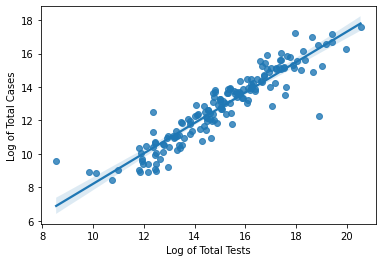

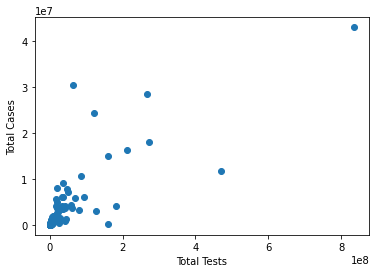

In [31]:
def _visualize_Ntest_and_Ncases(df):
    """
    
    N_tests_fig = plt.figure()
    N_tests_ax = N_tests_fig.add_subplot()
    N_tests_ax.hist(N_tests_dropna)
    N_tests_ax.set(xscale="log")
    N_tests_fig.show()
    """
    Ntests_and_Ncases = df[['TotalCases','TotalTests',"CODE"]]
    Ntests_and_Ncases_dropna = Ntests_and_Ncases.dropna()
    fig = plt.figure()
    fige = plt.figure()
    ax = fig.add_subplot()
    axe = fige.add_subplot()
    
    axe.set( xlabel="Total Tests", ylabel="Total Cases")
    axe.scatter(Ntests_and_Ncases_dropna['TotalTests'].to_list(), Ntests_and_Ncases_dropna['TotalCases'].to_list())
    ax.set(xlabel="Log of Total Tests", ylabel="Log of Total Cases")
    sns.regplot(x = np.log(Ntests_and_Ncases_dropna['TotalTests'].to_list()), y = np.log(Ntests_and_Ncases_dropna['TotalCases'].to_list()), ax = ax)
    #return Ntests_and_Ncases_dropna
_visualize_Ntest_and_Ncases(df)

In [32]:
CONTINENT = df['Continent'].unique()
CONTINENT

array(['Asia', 'Europe', 'South America', 'North America',
       'Australia/Oceania', 'Africa'], dtype=object)

{'TotalDeaths': {'Asia': 1388274.0, 'Europe': 1599135.0, 'South America': 1287776.0, 'North America': 435913.0, 'Australia/Oceania': 9495.0, 'Africa': 248747.0}, 'TotalCases': {'Asia': 128786383, 'Europe': 164100893, 'South America': 56138261, 'North America': 14773594, 'Australia/Oceania': 6863541, 'Africa': 11214403}, 'ActiveCases': {'Asia': 3141421.0, 'Europe': 9673664.0, 'South America': 487309.0, 'North America': 994422.0, 'Australia/Oceania': 403042.0, 'Africa': 391323.0}}
TotalDeaths of the whole world: 4969340.0
TotalCases of the whole world: 381877075
ActiveCases of the whole world: 15091181.0


/home/dungvt/.conda/envs/data_visualize/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


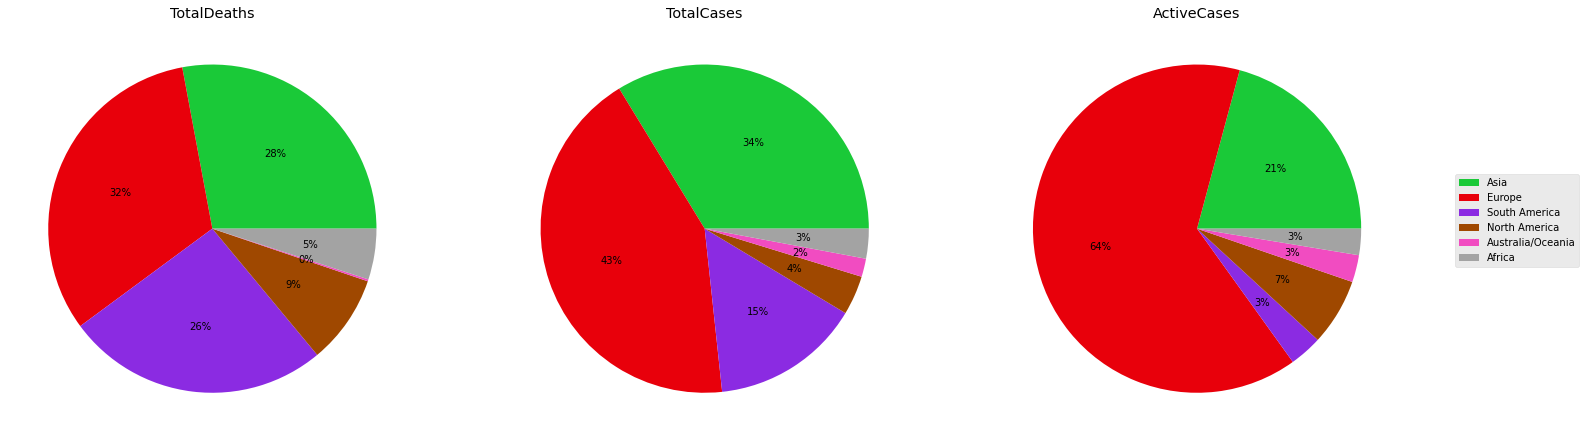

In [64]:
def _circular_percentage_death(df, continents, columns = ["TotalDeaths"]):
    dic = {}
    for k in columns:
        dic.update({k: {}})
    def _update_xs_of_continents(df,dic,continent, column):
        filt = df["Continent"] == continent
        continent_total_x = (df[filt])[column].sum()
    #    print(continent_total_deaths)
        dic[column].update({continent: continent_total_x})
        return dic
    
    
    # Using above function using for loop
    for conti in continents:
        for col in columns:
            dic = _update_xs_of_continents(df, dic, conti, col)
    print(dic)
    #for k,v in dic:
    #    print(k,v)
    data = {}
    labels = {}
    #plt.style.use('ggplot')
    for col in columns:
        
        sum_ = sum([v for k,v in dic[col].items()])
        print(f"{col} of the whole world: {sum_}")
    
    #define data
        data[col] = [v for k,v in dic[col].items()]
        labels[col] = [k for k in dic[col]]

    #def ine Seaborn color palette to use
    colors = sns.color_palette('bright')[2:8]
    fig, ax = plt.subplots(ncols=len(columns),figsize=(25,25),squeeze=False)
    for i in range(len(columns)):
        col = columns[i]
        dn = ax[0,i].pie(data[col], colors=colors, autopct='%.0f%%')
        ax[0,i].set(ylabel='', title=col, aspect='equal')
    #create pie chart
    #fig.figsize((15,15))
    #ax.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    fig.legend(dn[0],continents,loc="right")
    fig.show()
_circular_percentage_death(df, CONTINENT, columns= ["TotalDeaths", "TotalCases","ActiveCases"])
        